## Dataset preparation
This notebook imports participant data from TIME study, keeps only those who completed the study, comutes all the features, then saves two files:
1. Feature set for all the users
2. A sample of users to try different ML algorithms

## Import libraries
Import essential libraries here.

In [16]:
import sys
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Import participant status
We will import participant status data. So that we can filter out those who completed the study

In [6]:
## Import the status file
status_file = '/Users/adityaponnada/Downloads/time_study_data/participant_status_tracking_v2.csv'
status_df = pd.read_csv(status_file)

## Show the first few rows
print(status_df.head())
# Also print the columns names
print(status_df.columns)

   Record ID            Visualizer ID Participant Status  Consent Date  \
0       9001       sharpnessnextpouch           Completed    3/17/2020   
1       9002     uniformlyharmfulbush          Unenrolled    3/18/2020   
2       9003     hacksawscoldingdares            Withdrew    3/27/2020   
3       9004    dimnesscranialunheard           Completed    3/28/2020   
4       9005  coynessculminatebarista           Completed     4/8/2020   

  Date participant completed Date participant withdrew  \
0                  3/17/2021                       NaN   
1                        NaN                       NaN   
2                        NaN                 12/4/2020   
3                  3/28/2021                       NaN   
4                   4/8/2021                       NaN   

  Date participant unenrolled Date Devices Mailed ID of device loaned  \
0                         NaN           3/25/2020        C2F9214C2188   
1                  10/20/2020           3/25/2020        C2F

Now only keep the completed participants

In [7]:
## Filter completed participants. We will only keep the visualizerID and status columns
status_df = status_df[status_df['Participant Status '] == 'Completed'][['Visualizer ID', 'Participant Status ']]
# Rename the visualizerID column to participant_id.
status_df.rename(columns={'Visualizer ID': 'participant_id'}, inplace=True)
# Also rename participant status to status
status_df.rename(columns={'Participant Status ': 'status'}, inplace=True)
# Reset the index
status_df.reset_index(drop=True, inplace=True)
# Add @timestudy_com to the participant_id column
status_df['participant_id'] = status_df['participant_id'] + '@timestudy_com'
## Show the first few rows
print(status_df.head())
# Also print the shape of the dataframe
print(status_df.shape)


                           participant_id     status
0        sharpnessnextpouch@timestudy_com  Completed
1     dimnesscranialunheard@timestudy_com  Completed
2   coynessculminatebarista@timestudy_com  Completed
3  spinstersubatomiccoyness@timestudy_com  Completed
4     sadlyskilledlustfully@timestudy_com  Completed
(136, 2)


Save the completed participants IDs as a list

In [9]:
completed_participants = status_df['participant_id'].tolist()
# Display the completed participants
print(completed_participants)

['sharpnessnextpouch@timestudy_com', 'dimnesscranialunheard@timestudy_com', 'coynessculminatebarista@timestudy_com', 'spinstersubatomiccoyness@timestudy_com', 'sadlyskilledlustfully@timestudy_com', 'unfittedfactoiddivisive@timestudy_com', 'groinunratedbattery@timestudy_com', 'exploreparadoxmangle@timestudy_com', 'penpalsandbanklifting@timestudy_com', 'showplacefacingsanta@timestudy_com', 'lyricallymalformedrigor@timestudy_com', 'neutergoldfishsworn@timestudy_com', 'debatableuneasyeveryone@timestudy_com', 'peddlingventricleexert@timestudy_com', 'collisionmolarbreeze@timestudy_com', 'faucetsquealingcatapult@timestudy_com', 'bannisterhardwiredladle@timestudy_com', 'resupplyclappingyahoo@timestudy_com', 'punctuatelandingdeferred@timestudy_com', 'tattlingsupperlegroom@timestudy_com', 'vagabondnumerousflatterer@timestudy_com', 'anagramprobingscrooge@timestudy_com', 'equallustinessuntil@timestudy_com', 'crestedserpentspongy@timestudy_com', 'fracturerepurposealgebra@timestudy_com', 'cohesivepr

## Import compliance matrix
We will import hourly compliance matrix for all the completed participants

In [20]:
folder_path = '/Users/adityaponnada/Downloads/time_study_data/compliance_matrix/'
# Import all the csv files within this folder. But only for the completed participants. Then concatenate them into a single dataframe.
# Note: The folder is structured as follows:
# folder_path/participant_id/uema_feature_mx_*.csv. Here * is a wildcard that matches any characters.
# The code should first use the completed participant list, then loop through the folder path and find p[articipant_id folder. 
# Then once the matching folder found, just concatinate all the csv files that match the pattern uema_feature_mx_*.csv
all_files = []
for participant in completed_participants:
    participant_folder = f"{folder_path}{participant}/"
    # Find all the csv files that match the pattern uema_feature_mx_*.csv
    files = glob.glob(participant_folder + 'uema_feature_mx_*.csv')
    for file in files:
        all_files.append(pd.read_csv(file))
# Concatenate all the dataframes in the list into a single dataframe
compliance_matrix = pd.concat(all_files, ignore_index=True)
# Show the first few rows of the compliance matrix
print(compliance_matrix.head())
# Also print the shape of the compliance matrix
print(compliance_matrix.shape)

                     Participant_ID Initial_Prompt_Date Prompt_Type  \
0  sharpnessnextpouch@timestudy_com          2020-06-24   EMA_Micro   
1  sharpnessnextpouch@timestudy_com          2020-06-24   EMA_Micro   
2  sharpnessnextpouch@timestudy_com          2020-06-24   EMA_Micro   
3  sharpnessnextpouch@timestudy_com          2020-06-24   EMA_Micro   
4  sharpnessnextpouch@timestudy_com          2020-06-24   EMA_Micro   

  Study_Mode     Initial_Prompt_Local_Time Answer_Status  \
0       TIME  Wed Jun 24 05:34:02 PDT 2020     Completed   
1       TIME  Wed Jun 24 05:43:02 PDT 2020     Completed   
2       TIME  Wed Jun 24 05:51:02 PDT 2020     Completed   
3       TIME  Wed Jun 24 06:14:03 PDT 2020  NeverStarted   
4       TIME  Wed Jun 24 06:33:05 PDT 2020     Completed   

       Actual_Prompt_Local_Time  First_Question_Completion_Unixtime  \
0  Wed Jun 24 05:34:02 PDT 2020                       1593002047735   
1  Wed Jun 24 05:43:02 PDT 2020                       1593002586653   

In [22]:
## Get the number of rows in compliance_matrix
num_rows = compliance_matrix.shape[0]
print(f"Number of rows in compliance_matrix: {num_rows}")
# Get the number of columns in compliance_matrix
num_cols = compliance_matrix.shape[1]
print(f"Number of columns in compliance_matrix: {num_cols}")
# Get the number of unique participants in compliance_matrix
num_participants = compliance_matrix['Participant_ID'].nunique()
print(f"Number of unique participants in compliance_matrix: {num_participants}")

Number of rows in compliance_matrix: 1495495
Number of columns in compliance_matrix: 62
Number of unique participants in compliance_matrix: 137


Save the file for later access

In [23]:
## Save compliance_matrix to a csv file. The filename should have _date_time appended to it.
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
compliance_matrix.to_csv(f'/Users/adityaponnada/Downloads/time_study_data/compliance_matrix_{current_time}.csv', index=False)
print(f"Compliance matrix saved to /Users/adityaponnada/Downloads/time_study_data/compliance_matrix_{current_time}.csv")

Compliance matrix saved to /Users/adityaponnada/Downloads/time_study_data/compliance_matrix_20250701_115558.csv


### Sample 10 participants
We just sample ten participants for model testing for now

In [24]:
## Sample 10 participants from completed participants
sampled_participants = np.random.choice(completed_participants, size=10, replace=False)
print("Sampled Participants:")
for participant in sampled_participants:
    print(participant)

# Subset the compliance matrix to only include the sampled participants and save it in a new data frame
sampled_compliance_matrix = compliance_matrix[compliance_matrix['Participant_ID'].isin(sampled_participants)]
# Show the first few rows of the sampled compliance matrix
print(sampled_compliance_matrix.head())
# Also print the shape of the sampled compliance matrix
print(sampled_compliance_matrix.shape)

# Save the sampled compliance matrix to a csv file
sampled_compliance_matrix.to_csv(f'/Users/adityaponnada/Downloads/time_study_data/sample_compliance_matrix_{current_time}.csv', index=False)
print(f"Sampled compliance matrix saved to /Users/adityaponnada/Downloads/time_study_data/sample_compliance_matrix_{current_time}.csv")

Sampled Participants:
enjoyergoofinessgrudge@timestudy_com
erasuresafeguardravishing@timestudy_com
persevereriseswoop@timestudy_com
neutergoldfishsworn@timestudy_com
remoldexcludingaffair@timestudy_com
subtitlegrievousbazooka@timestudy_com
slapstickporcupineslacks@timestudy_com
pretendedconstrainfraying@timestudy_com
certifiedembargobartender@timestudy_com
chewingslouchingfailing@timestudy_com
                           Participant_ID Initial_Prompt_Date  \
132810  neutergoldfishsworn@timestudy_com          2021-02-22   
132811  neutergoldfishsworn@timestudy_com          2021-02-22   
132812  neutergoldfishsworn@timestudy_com          2021-02-22   
132813  neutergoldfishsworn@timestudy_com          2021-02-22   
132814  neutergoldfishsworn@timestudy_com          2021-02-22   

             Prompt_Type Study_Mode     Initial_Prompt_Local_Time  \
132810         EMA_Micro       TIME  Mon Feb 22 16:53:05 PST 2021   
132811      CS_EMA_Micro       TIME  Mon Feb 22 17:30:04 PST 2021   
13281

Inspect the sample data

In [25]:
## Get the number of rows per participant in the sampled compliance matrix
rows_per_participant = sampled_compliance_matrix['Participant_ID'].value_counts()
print("Number of rows per participant in the sampled compliance matrix:")
print(rows_per_participant)

Number of rows per participant in the sampled compliance matrix:
Participant_ID
pretendedconstrainfraying@timestudy_com    15440
subtitlegrievousbazooka@timestudy_com      13303
chewingslouchingfailing@timestudy_com      13283
persevereriseswoop@timestudy_com           12993
certifiedembargobartender@timestudy_com    11555
slapstickporcupineslacks@timestudy_com     11437
enjoyergoofinessgrudge@timestudy_com       10457
neutergoldfishsworn@timestudy_com           8724
remoldexcludingaffair@timestudy_com         6426
erasuresafeguardravishing@timestudy_com     4457
Name: count, dtype: int64


In [26]:
## Print the names of the columns in the sampled compliance matrix
print("Columns in the sampled compliance matrix:")
for col in sampled_compliance_matrix.columns:
    print(col)

Columns in the sampled compliance matrix:
Participant_ID
Initial_Prompt_Date
Prompt_Type
Study_Mode
Initial_Prompt_Local_Time
Answer_Status
Actual_Prompt_Local_Time
First_Question_Completion_Unixtime
UTC_Offset
Reprompt_Num
Line
Actual_Prompt_Local_DateTime
DAY_OF_THE_WEEK
TIME_OF_THE_DAY
DAYS_IN_THE_STUDY
BATTERY_LEVEL
CHARGING_STATUS
match_time_battery
LOCATION
match_time_location
DISTANCE_FROM_HOME
LOCATION_LABEL
SCREEN_STATUS
match_time_screen
WAKE_TIME
SLEEP_TIME
PHONE_LOCK
LAST_USAGE_DURATION
match_time_lock
PARTS_OF_WAKING_HOUR
PROXIMITY_TO_WAKE_TIME
PROXIMITY_TO_SLEEP_TIME
mims_summary_1min
num_readings_1min
start_time_1min
mims_summary_2min
num_readings_2min
start_time_2min
mims_summary_3min
num_readings_3min
start_time_3min
mims_summary_4min
num_readings_4min
start_time_4min
mims_summary_5min
num_readings_5min
start_time_5min
mims_summary_6min
num_readings_6min
start_time_6min
mims_summary_7min
num_readings_7min
start_time_7min
mims_summary_8min
num_readings_8min
start_time_8

## Feature processing
We will compute features from each of the relevant columns one by one.
First, we will write the function, then apply the function to the data frame.

In [30]:
## First create a copy of the sampled compliance matrix
processed_compliance_matrix = sampled_compliance_matrix.copy()
# Show the first few rows of the processed compliance matrix
print(processed_compliance_matrix.head())

                           Participant_ID Initial_Prompt_Date  \
132810  neutergoldfishsworn@timestudy_com          2021-02-22   
132811  neutergoldfishsworn@timestudy_com          2021-02-22   
132812  neutergoldfishsworn@timestudy_com          2021-02-22   
132813  neutergoldfishsworn@timestudy_com          2021-02-22   
132814  neutergoldfishsworn@timestudy_com          2021-02-22   

             Prompt_Type Study_Mode     Initial_Prompt_Local_Time  \
132810         EMA_Micro       TIME  Mon Feb 22 16:53:05 PST 2021   
132811      CS_EMA_Micro       TIME  Mon Feb 22 17:30:04 PST 2021   
132812         EMA_Micro       TIME  Mon Feb 22 17:38:04 PST 2021   
132813         EMA_Micro       TIME  Mon Feb 22 17:46:14 PST 2021   
132814  Trivia_EMA_Micro       TIME  Mon Feb 22 17:54:03 PST 2021   

       Answer_Status      Actual_Prompt_Local_Time  \
132810     Completed  Mon Feb 22 16:53:05 PST 2021   
132811     Completed  Mon Feb 22 17:30:04 PST 2021   
132812     Completed  Mon Feb 22

## The outcome variable
We will convert answer status into 0 or 1 based on whether it was answered or not,

In [31]:
## Inspect the answer status column
print("Unique values in the Answer_Status column:")
print(processed_compliance_matrix['Answer_Status'].unique())

Unique values in the Answer_Status column:
['Completed' 'NeverStarted' 'Started' 'PartiallyCompleted'
 'CompletedThenDismissed']


In [33]:
## Show sample rows from each category of the Answer_Status column
for status in processed_compliance_matrix['Answer_Status'].unique():
    print(f"Sample rows for Answer_Status = {status}:")
    sample_rows = processed_compliance_matrix[processed_compliance_matrix['Answer_Status'] == status].sample(n=1, random_state=42)
    print(sample_rows)
    print("\n")

Sample rows for Answer_Status = Completed:
                                 Participant_ID Initial_Prompt_Date  \
369579  pretendedconstrainfraying@timestudy_com          2021-06-24   

         Prompt_Type Study_Mode     Initial_Prompt_Local_Time Answer_Status  \
369579  CS_EMA_Micro       TIME  Thu Jun 24 07:59:46 PDT 2021     Completed   

            Actual_Prompt_Local_Time  First_Question_Completion_Unixtime  \
369579  Thu Jun 24 07:59:46 PDT 2021                       1624546805043   

       UTC_Offset  Reprompt_Num  ...          start_time_7min  \
369579  GMT-07:00             0  ...  2021-06-24 07:52:46.000   

       mims_summary_8min  num_readings_8min          start_time_8min  \
369579               0.0              480.0  2021-06-24 07:51:46.000   

       mims_summary_9min num_readings_9min          start_time_9min  \
369579               0.0             540.0  2021-06-24 07:50:46.000   

       mims_summary_10min num_readings_10min         start_time_10min  
369579     

In [34]:
## Check the distribution of answer status
answer_status_counts = processed_compliance_matrix['Answer_Status'].value_counts()
print("Distribution of Answer_Status:")
print(answer_status_counts)

Distribution of Answer_Status:
Answer_Status
Completed                 93246
NeverStarted              13691
Started                     550
CompletedThenDismissed      487
PartiallyCompleted          101
Name: count, dtype: int64


In [35]:
## Create a new column 'Outcome' based on the 'Answer_Status' column. 
## The value is 1 if the answer status is either Completed, CompletedThenDismissed, and Partially completed. Else it is 0 for other cases.
processed_compliance_matrix['Outcome'] = processed_compliance_matrix['Answer_Status'].apply(
    lambda x: 1 if x in ['Completed', 'CompletedThenDismissed', 'PartiallyCompleted'] else 0
)

In [36]:
## Check the distribution of the Outcome column
outcome_counts = processed_compliance_matrix['Outcome'].value_counts()
print("Distribution of Outcome:")
print(outcome_counts)

Distribution of Outcome:
Outcome
1    93834
0    14241
Name: count, dtype: int64


In [37]:
## Check the distribtion of the Outcome column in perceontage
outcome_percentage = processed_compliance_matrix['Outcome'].value_counts(normalize=True) * 100
print("Distribution of Outcome in percentage:")
print(outcome_percentage)

Distribution of Outcome in percentage:
Outcome
1    86.82304
0    13.17696
Name: proportion, dtype: float64


## Predicting features (At the prompt moment)
Now we will compute and prep predictor features one by one.

### Day of the week
We will convert day of the week into weekday (1) and weekend (0)

In [39]:
## Show distribution of the day of the week variable
day_of_week_counts = processed_compliance_matrix['DAY_OF_THE_WEEK'].value_counts()
print("Distribution of Day_of_Week:")
print(day_of_week_counts)

Distribution of Day_of_Week:
DAY_OF_THE_WEEK
2    20205
3    17919
1    17075
4    15791
0    13626
5    12348
6    11111
Name: count, dtype: int64


In [45]:
## As a test, sample one random row from the processed compliance matrix for each of the DAY_OF_THE_WEEK. 
## Save it in dataframe. We only want two columns - Prompt_Date and DAY_OF_THE_WEEK
sampled_day_of_week = processed_compliance_matrix.groupby('DAY_OF_THE_WEEK').apply(lambda x: x.sample(1)).reset_index(drop=True)
# Show the sampled day of week dataframe, but only two columns - Prompt_Date and DAY_OF_THE_WEEK
sampled_day_of_week = sampled_day_of_week[['Initial_Prompt_Date', 'DAY_OF_THE_WEEK']]
print("Sampled Day of Week DataFrame:")
print(sampled_day_of_week)

Sampled Day of Week DataFrame:
  Initial_Prompt_Date  DAY_OF_THE_WEEK
0          2021-01-11                0
1          2021-06-22                1
2          2021-08-11                2
3          2021-02-18                3
4          2022-04-22                4
5          2022-02-26                5
6          2021-07-18                6


/var/folders/h6/3rl340nn7cg92xvwk801_3b80000gn/T/ipykernel_45934/1516588673.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_day_of_week = processed_compliance_matrix.groupby('DAY_OF_THE_WEEK').apply(lambda x: x.sample(1)).reset_index(drop=True)


In [52]:
## Create a new column is_weekend that is 1 if the DAY_OF_THE_WEEK is Saturday or Sunday, else 0.
## For this, values for DAY_OF_THE_WEEK are 0 for Monday, 1 for Tuesday, ..., 5 for Saturday, and 6 for Sunday.
processed_compliance_matrix['is_weekend'] = processed_compliance_matrix['DAY_OF_THE_WEEK'].apply(
    lambda x: 1 if x in [5, 6] else 0
)

# Show the first few rows of the processed compliance matrix with the new is_weekend column
print(processed_compliance_matrix['is_weekend'].head())

132810    0
132811    0
132812    0
132813    0
132814    0
Name: is_weekend, dtype: int64


In [53]:
## Show the distribution of weekend and weekday
weekend_counts = processed_compliance_matrix['is_weekend'].value_counts()
print("Distribution of is_weekend:")
print(weekend_counts)

Distribution of is_weekend:
is_weekend
0    84616
1    23459
Name: count, dtype: int64


### Time of the day
We will convert the prompt time in six parts - Early morning, morning, afternoon, evening, night, late night

In [64]:
## First check the data typoe of intial prompt time column
print("Data type of Initial_Prompt_Time column:")
print(processed_compliance_matrix['Actual_Prompt_Local_Time'].dtype)
## Show the first three rows of the Actual_Prompt_Local_Time column
print("First three rows of Actual_Prompt_Local_Time column:")
print(processed_compliance_matrix['Actual_Prompt_Local_Time'].head(3))

Data type of Initial_Prompt_Time column:
object
First three rows of Actual_Prompt_Local_Time column:
132810    Mon Feb 22 16:53:05 PST 2021
132811    Mon Feb 22 17:30:04 PST 2021
132812    Mon Feb 22 17:38:04 PST 2021
Name: Actual_Prompt_Local_Time, dtype: object


In [68]:
## Convert the prompt time in six parts - Early morning, morning, afternoon, evening, night, late night.
## We will create a new column 'Time_of_Day' based on the 'Prompt_Time' column. 
## Early morning  - 4 AM to 8 AM, morning 8 AM - 12 noon, afternoon 12 noon to 4 PM, 
## evening 4 PM to 8 PM, night 8 PM to 12 midnight, late night 12 midnight to 4 AM.
## Note that Actual_Prompt_Local_Time is of type 'object'. 
## We should convert it to strng first. Then remove the time zone from the string
## Then we convert it to date time object.
## Once done, we will create a new column 'Time_of_Day' based on the hour of the day.
## All this will be done in a single function.
def convert_prompt_time_to_time_of_day(prompt_time):
    # Convert to string and remove the timezone information. Time zone is any three letter word.
    # For example Mon Feb 22 16:53:05 PST 2021 should become 'Mon Feb 22 16:53:05 2021'.
    # But timezone could be anything like PST, EST, GMT, etc. These three letters are placed in position 20 to 22 in the string.
    # So we will slice the string to remove the timezone.
    prompt_time_str = str(prompt_time)[:19] + str(prompt_time)[23:]
    ## Print the prompt_time_str to check if it is correct
    # print(f"Processed Prompt Time String: {prompt_time_str}")


    # Convert to datetime object, in the format similar to ""
    prompt_time_dt = pd.to_datetime(prompt_time_str, format='%a %b %d %H:%M:%S %Y')
    # Get the hour of the day
    hour = prompt_time_dt.hour
    
    # Determine the time of day based on the hour
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:  # This covers the case for hours between 0 and 4
        return 'Late Night'
    
# Apply the function to the 'Actual_Prompt_Local_Time' column
processed_compliance_matrix['Time_of_Day'] = processed_compliance_matrix['Actual_Prompt_Local_Time'].apply(convert_prompt_time_to_time_of_day)

In [71]:
## Check the time_of_day column and actual prompt time column together
print("Time_of_Day and Actual_Prompt_Local_Time columns:")
print(processed_compliance_matrix[['Time_of_Day', 'Actual_Prompt_Local_Time']].head(10))

# Sample randomrows to print. But display only actual prompt time and time of day columns
sampled_rows = processed_compliance_matrix[['Actual_Prompt_Local_Time', 'Time_of_Day']].sample(n=10, random_state=42)
print("Sampled rows of Actual_Prompt_Local_Time and Time_of_Day:")
print(sampled_rows) 

Time_of_Day and Actual_Prompt_Local_Time columns:
       Time_of_Day      Actual_Prompt_Local_Time
132810     Evening  Mon Feb 22 16:53:05 PST 2021
132811     Evening  Mon Feb 22 17:30:04 PST 2021
132812     Evening  Mon Feb 22 17:38:04 PST 2021
132813     Evening  Mon Feb 22 17:46:14 PST 2021
132814     Evening  Mon Feb 22 17:54:03 PST 2021
132815     Evening  Mon Feb 22 18:26:04 PST 2021
132816     Evening  Mon Feb 22 18:35:11 PST 2021
132817     Evening  Mon Feb 22 18:44:35 PST 2021
132818     Evening  Mon Feb 22 18:53:05 PST 2021
132819     Evening  Mon Feb 22 19:29:05 PST 2021
Sampled rows of Actual_Prompt_Local_Time and Time_of_Day:
             Actual_Prompt_Local_Time Time_of_Day
612985   Tue Nov 16 10:31:00 PST 2021     Morning
1169198  Thu Aug 26 16:14:04 MDT 2021     Evening
1094242  Thu Nov 04 15:26:03 CDT 2021   Afternoon
378860   Fri Nov 27 21:08:04 PST 2020       Night
456906   Wed May 12 18:13:04 PDT 2021     Evening
1412867  Fri Nov 12 17:36:03 EST 2021     Evening
112

In [72]:
## Get the distribution of the Time_of_Day column
time_of_day_counts = processed_compliance_matrix['Time_of_Day'].value_counts()
print("Distribution of Time_of_Day:")
print(time_of_day_counts)

Distribution of Time_of_Day:
Time_of_Day
Evening          29375
Afternoon        29105
Morning          21805
Night            21648
Late Night        3272
Early Morning     2870
Name: count, dtype: int64


### Battery levels
We will compute battery level as being in battery saver mode or not


In [75]:
## Preview battery level data
print("Battery Level column data:")
print(processed_compliance_matrix['BATTERY_LEVEL'].head(10))
## Get the data type of the BATTERY_LEVEL column
print("Data type of BATTERY_LEVEL column:")
print(processed_compliance_matrix['BATTERY_LEVEL'].dtype)

Battery Level column data:
132810                 66.0
132811                 64.0
132812                   NF
132813                 63.0
132814                   NF
132815                   NF
132816                   NF
132817    60.00000381469727
132818                   NF
132819                   NF
Name: BATTERY_LEVEL, dtype: object
Data type of BATTERY_LEVEL column:
object


In [80]:
## Convert Batterry_level to float. Coerce into numeric values, replacing errors with NaN
processed_compliance_matrix['BATTERY_LEVEL'] = pd.to_numeric(processed_compliance_matrix['BATTERY_LEVEL'], errors='coerce')
# Show the first few rows of the processed compliance matrix with the new BATTERY_LEVEL column
print(processed_compliance_matrix['BATTERY_LEVEL'].head(10))

132810    66.000000
132811    64.000000
132812          NaN
132813    63.000000
132814          NaN
132815          NaN
132816          NaN
132817    60.000004
132818          NaN
132819          NaN
Name: BATTERY_LEVEL, dtype: float64


In [81]:
## Get the distribution of NaN values in the BATTERY_LEVEL column vs the non-NaN values
nan_battery_level_counts = processed_compliance_matrix['BATTERY_LEVEL'].isna().value_counts()
print("Distribution of NaN and non-NaN values in BATTERY_LEVEL:")
print(nan_battery_level_counts)


Distribution of NaN and non-NaN values in BATTERY_LEVEL:
BATTERY_LEVEL
True     56409
False    51666
Name: count, dtype: int64


In [82]:
## Code BATTERY LEVEL as in_battery_saver_mode column if the battery level is less than 15, else 0. If NaN, then keep it as Nan.
processed_compliance_matrix['in_battery_saver_mode'] = processed_compliance_matrix['BATTERY_LEVEL'].apply(
    lambda x: 1 if x < 15 else (0 if pd.notna(x) else np.nan)
)
# Show the first few rows of the processed compliance matrix with the new in_battery_saver_mode column
print(processed_compliance_matrix['in_battery_saver_mode'].head(10))

132810    0.0
132811    0.0
132812    NaN
132813    0.0
132814    NaN
132815    NaN
132816    NaN
132817    0.0
132818    NaN
132819    NaN
Name: in_battery_saver_mode, dtype: float64


### Charging status
Convert the charging status into binary for charging 0 or 1

In [83]:
## Get the distribution of CHARGING_STATUS column
charging_status_counts = processed_compliance_matrix['CHARGING_STATUS'].value_counts()
print("Distribution of CHARGING_STATUS:")
print(charging_status_counts)

Distribution of CHARGING_STATUS:
CHARGING_STATUS
NF     56409
NO     44975
YES     6691
Name: count, dtype: int64


In [84]:
## Convert Charging status to 0 is not charging, 1 if charging, and NaN if NF
processed_compliance_matrix['CHARGING_STATUS'] = processed_compliance_matrix['CHARGING_STATUS'].apply(
    lambda x: 1 if x == 'YES' else (0 if x == 'NO' else np.nan)
)
# Show the first few rows of the processed compliance matrix with the new CHARGING_STATUS column
print(processed_compliance_matrix['CHARGING_STATUS'].head(10))

132810    0.0
132811    0.0
132812    NaN
132813    0.0
132814    NaN
132815    NaN
132816    NaN
132817    0.0
132818    NaN
132819    NaN
Name: CHARGING_STATUS, dtype: float64


In [88]:
## Get the distribution of the charghing status column, including NA values
charging_status_counts = processed_compliance_matrix['CHARGING_STATUS'].value_counts()
print("Distribution of CHARGING_STATUS including NaN values:")
print(charging_status_counts)

Distribution of CHARGING_STATUS including NaN values:
CHARGING_STATUS
0.0    44975
1.0     6691
Name: count, dtype: int64


### Location data
We process location data as home, work, school, others, and transit

In [89]:
## Get the distribution of location labels in %
location_label_counts = processed_compliance_matrix['LOCATION_LABEL'].value_counts(normalize=True) * 100
print("Distribution of LOCATION_LABEL in percentage:")
print(location_label_counts)

Distribution of LOCATION_LABEL in percentage:
LOCATION_LABEL
['Home']                                 61.129771
[]                                       16.660652
NF                                       13.877400
['Friend’s/Romantic partner’s place']     3.138561
['Work']                                  2.176266
['Family member’s place']                 0.739301
['School/College']                        0.485774
['Gym/Health club/Fitness center']        0.416378
['Hotel/motel']                           0.391395
['Restaurant/bar/cafe']                   0.355309
['Store/shopping venue']                  0.127689
['Other']                                 0.099931
['Beach/pool']                            0.074948
['Church/place of worship']               0.074948
['Salon/barber/spa']                      0.063845
['Park/Playground']                       0.049965
['Medical clinic/Hospital']               0.045339
['In car/vehicle/train']                  0.031460
['Parking lot/structu

In [92]:
## Create a new column 'Location_Category' based on the 'LOCATION_LABEL' column.
## The value is 'Home' if the location label is ['Home'], 'Work' if the location label is ['Work']
## 'School' if the location label is ['School/College']
## 'Transit' if the location label is either [] or ['Transit center/bus stop']
## 'Other' if the location label is anything else.
def categorize_location(location_label):
    if location_label == "['Home']":
        return 'Home'
    elif location_label == "['Work']":
        return 'Work'
    elif location_label == "['School/College']":
        return 'School'
    elif location_label in ["[]", "['Transit center/bus stop']"]:
        return 'Transit'
    else:
        return 'Other'

# Apply the function to the 'LOCATION_LABEL' column
processed_compliance_matrix['Location_Category'] = processed_compliance_matrix['LOCATION_LABEL'].apply(categorize_location)
# Show the first few rows of the processed compliance matrix with the new Location_Category column
print(processed_compliance_matrix['Location_Category'].head(10))

132810    Transit
132811    Transit
132812    Transit
132813    Transit
132814    Transit
132815    Transit
132816    Transit
132817    Transit
132818    Transit
132819    Transit
Name: Location_Category, dtype: object


In [94]:
## Get the distribution of the location category column, including the NaN values
location_category_counts = processed_compliance_matrix['Location_Category'].value_counts(normalize=True) * 100
print("Distribution of Location_Category including NaN values:")
print(location_category_counts)

Distribution of Location_Category including NaN values:
Location_Category
Home       61.129771
Other      19.535508
Transit    16.672681
Work        2.176266
School      0.485774
Name: proportion, dtype: float64


In [95]:
## get the column names in the processed compliance matrix
print("Column names in the processed compliance matrix:")
for col in processed_compliance_matrix.columns:
    print(col)

Column names in the processed compliance matrix:
Participant_ID
Initial_Prompt_Date
Prompt_Type
Study_Mode
Initial_Prompt_Local_Time
Answer_Status
Actual_Prompt_Local_Time
First_Question_Completion_Unixtime
UTC_Offset
Reprompt_Num
Line
Actual_Prompt_Local_DateTime
DAY_OF_THE_WEEK
TIME_OF_THE_DAY
DAYS_IN_THE_STUDY
BATTERY_LEVEL
CHARGING_STATUS
match_time_battery
LOCATION
match_time_location
DISTANCE_FROM_HOME
LOCATION_LABEL
SCREEN_STATUS
match_time_screen
WAKE_TIME
SLEEP_TIME
PHONE_LOCK
LAST_USAGE_DURATION
match_time_lock
PARTS_OF_WAKING_HOUR
PROXIMITY_TO_WAKE_TIME
PROXIMITY_TO_SLEEP_TIME
mims_summary_1min
num_readings_1min
start_time_1min
mims_summary_2min
num_readings_2min
start_time_2min
mims_summary_3min
num_readings_3min
start_time_3min
mims_summary_4min
num_readings_4min
start_time_4min
mims_summary_5min
num_readings_5min
start_time_5min
mims_summary_6min
num_readings_6min
start_time_6min
mims_summary_7min
num_readings_7min
start_time_7min
mims_summary_8min
num_readings_8min
start

### Screen status
We want to create a new screen status variable called screen_on.

In [96]:
## Get the distribution of screen status column
screen_status_counts = processed_compliance_matrix['SCREEN_STATUS'].value_counts()
print("Distribution of SCREEN_STATUS:")
print(screen_status_counts)

Distribution of SCREEN_STATUS:
SCREEN_STATUS
Screen Off    75384
Screen On     32691
Name: count, dtype: int64


In [97]:
## Convert the screen status to a new variable called screen_on.
## The value is 1 if the screen status is 'ON', else 0.
processed_compliance_matrix['screen_on'] = processed_compliance_matrix['SCREEN_STATUS'].apply(
    lambda x: 1 if x == 'Screen On' else 0
)
# Show the first few rows of the processed compliance matrix with the new screen_on column
print(processed_compliance_matrix['screen_on'].head(10))

132810    0
132811    0
132812    0
132813    0
132814    0
132815    0
132816    1
132817    1
132818    1
132819    0
Name: screen_on, dtype: int64


In [99]:
## Get the distribution of screen on column
screen_on_counts = processed_compliance_matrix['screen_on'].value_counts(normalize=True) * 100
print("Distribution of screen_on:")
print(screen_on_counts)

Distribution of screen_on:
screen_on
0    69.751561
1    30.248439
Name: proportion, dtype: float64


### Distance from home
How far is the user from home cluster?

In [103]:
## Show the head of distance from home column
print("Head of Distance_From_Home column:")
print(processed_compliance_matrix['DISTANCE_FROM_HOME'].head(5))

Head of Distance_From_Home column:
132810    1.410097
132811    1.410266
132812    1.410192
132813    1.409937
132814    1.409865
Name: DISTANCE_FROM_HOME, dtype: object


In [104]:
## Create a new column dist_from_home that is the float value of the DISTANCE_FROM_HOME column.
processed_compliance_matrix['dist_from_home'] = pd.to_numeric(processed_compliance_matrix['DISTANCE_FROM_HOME'], errors='coerce')
# Show the first few rows of the processed compliance matrix with the new dist_from_home column
print(processed_compliance_matrix['dist_from_home'].head(10))

132810    1.410097
132811    1.410266
132812    1.410192
132813    1.409937
132814    1.409865
132815    0.017560
132816    0.017275
132817    0.027509
132818    0.009400
132819    0.012270
Name: dist_from_home, dtype: float64


In [105]:
## Get the descriptive statuistics of the dist_from_home column
dist_from_home_stats = processed_compliance_matrix['dist_from_home'].describe()
print("Descriptive statistics of dist_from_home:")
print(dist_from_home_stats)

Descriptive statistics of dist_from_home:
count    93077.000000
mean        17.500801
std        195.775722
min          0.000024
25%          0.009734
50%          0.018917
75%          0.033518
max       3852.825147
Name: dist_from_home, dtype: float64


Text(0, 0.5, 'Frequency')

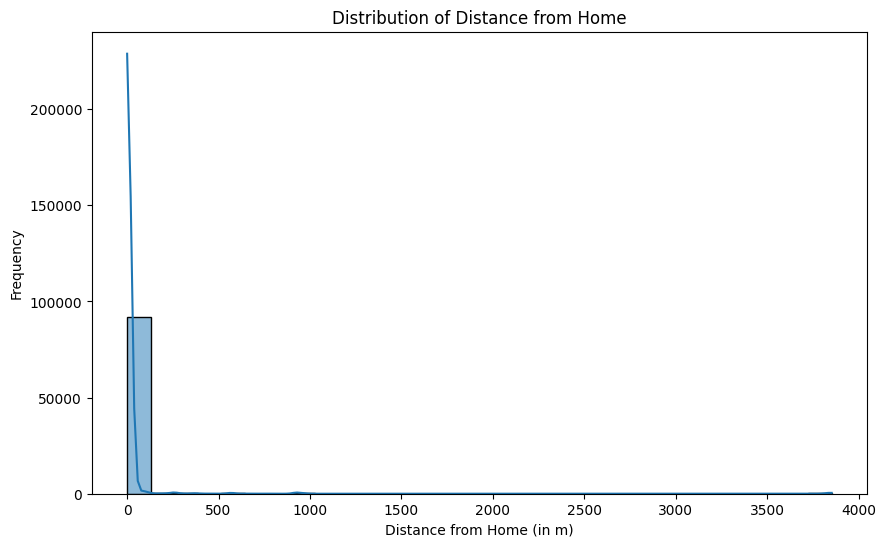

In [106]:
## Plot ther histogram of the dist_from_home column
plt.figure(figsize=(10, 6))
sns.histplot(processed_compliance_matrix['dist_from_home'].dropna(), bins=30, kde=True)
plt.title('Distribution of Distance from Home')
plt.xlabel('Distance from Home (in m)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

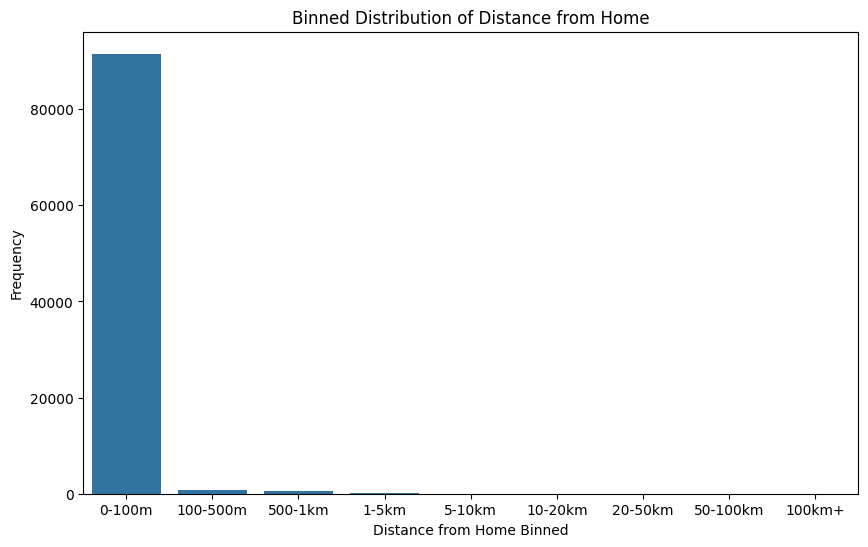

In [107]:
## Create a binned plot of the dist_from_home column
plt.figure(figsize=(10, 6))
bins = [0, 100, 500, 1000, 5000, 10000, 20000, 50000, 100000, np.inf]
labels = ['0-100m', '100-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km', '100km+']
processed_compliance_matrix['dist_from_home_binned'] = pd.cut(processed_compliance_matrix['dist_from_home'], bins=bins, labels=labels, right=False)
sns.countplot(data=processed_compliance_matrix, x='dist_from_home_binned', order=labels)
plt.title('Binned Distribution of Distance from Home')
plt.xlabel('Distance from Home Binned')
plt.ylabel('Frequency')

### Phone lock
Whether the phone is currently locked or in active use

In [108]:
## Get the distribution of phone lock status
phone_lock_status_counts = processed_compliance_matrix['PHONE_LOCK'].value_counts()
print("Distribution of PHONE_LOCK_STATUS:")
print(phone_lock_status_counts)

Distribution of PHONE_LOCK_STATUS:
PHONE_LOCK
Phone Locked      68627
Phone Unlocked    24531
NF                14917
Name: count, dtype: int64


In [109]:
## Create a new column is_phone_locked. It is 1 if 'Phone Locked', 0 if 'Phone Unlocked', and NaN if 'NF'.
processed_compliance_matrix['is_phone_locked'] = processed_compliance_matrix['PHONE_LOCK'].apply(
    lambda x: 1 if x == 'Phone Locked' else (0 if x == 'Phone Unlocked' else np.nan)
)
# Show the first few rows of the processed compliance matrix with the new is_phone_locked column
print(processed_compliance_matrix['is_phone_locked'].head(10))  

132810    1.0
132811    1.0
132812    1.0
132813    1.0
132814    1.0
132815    1.0
132816    0.0
132817    0.0
132818    1.0
132819    1.0
Name: is_phone_locked, dtype: float64


In [111]:
## Get the distribution of phone lock status
phone_lock_status_counts = processed_compliance_matrix['is_phone_locked'].value_counts()
print("Distribution of is_phone_locked:")
print(phone_lock_status_counts)

## Count the % of NaN values in the is_phone_locked column
nan_is_phone_locked_percentage = processed_compliance_matrix['is_phone_locked'].isna().mean() * 100
print(f"Percentage of NaN values in is_phone_locked: {nan_is_phone_locked_percentage:.2f}%")

Distribution of is_phone_locked:
is_phone_locked
1.0    68627
0.0    24531
Name: count, dtype: int64
Percentage of NaN values in is_phone_locked: 13.80%
